In [3]:
# Importera bibliotek
import numpy as np
from tensorflow.keras.datasets import mnist

# Ladda och förbehandla data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisera pixelvärden till [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Dela upp i träning, validering och testdata
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Kontrollera datastorlek
print("Träning:", X_train.shape)
print("Validering:", X_val.shape)
print("Test:", X_test.shape)


Träning: (48000, 28, 28)
Validering: (12000, 28, 28)
Test: (10000, 28, 28)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Reshape data till 2D (vektorform för logistisk regression)
X_train_flat = X_train.reshape(-1, 28 * 28)
X_val_flat = X_val.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)

# Träna modellen
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_flat, y_train)

# Utvärdera modellen
val_pred_log = log_reg.predict(X_val_flat)
test_pred_log = log_reg.predict(X_test_flat)
print("Logistisk regression - Valideringsnoggrannhet:", accuracy_score(y_val, val_pred_log))
print("Logistisk regression - Testnoggrannhet:", accuracy_score(y_test, test_pred_log))


Logistisk regression - Valideringsnoggrannhet: 0.9221666666666667
Logistisk regression - Testnoggrannhet: 0.9246


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Skapa och träna neuralt nätverk
model_nn = Sequential([
    Flatten(input_shape=(28, 28)),  # Platta ut 2D till 1D
    Dense(128, activation="relu"), # Dold lager
    Dense(10, activation="softmax") # Utgångslager (10 klasser)
])

model_nn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8644 - loss: 0.4739 - val_accuracy: 0.9528 - val_loss: 0.1655
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9581 - loss: 0.1394 - val_accuracy: 0.9642 - val_loss: 0.1189
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9737 - loss: 0.0921 - val_accuracy: 0.9707 - val_loss: 0.0960
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9807 - loss: 0.0652 - val_accuracy: 0.9726 - val_loss: 0.0953
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9849 - loss: 0.0478 - val_accuracy: 0.9752 - val_loss: 0.0818


In [10]:
# Utvärdera på testdata
test_loss_nn, test_acc_nn = model_nn.evaluate(X_test, y_test)
print("Neuralt nätverk - Testnoggrannhet:", test_acc_nn)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9736 - loss: 0.0963
Neuralt nätverk - Testnoggrannhet: 0.9763000011444092


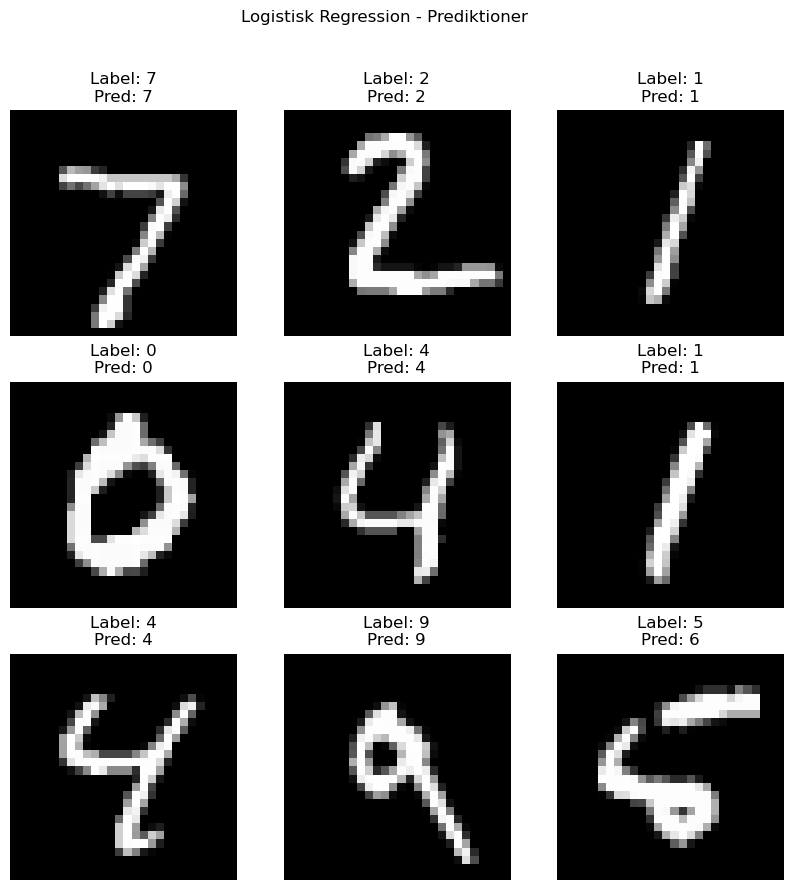

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


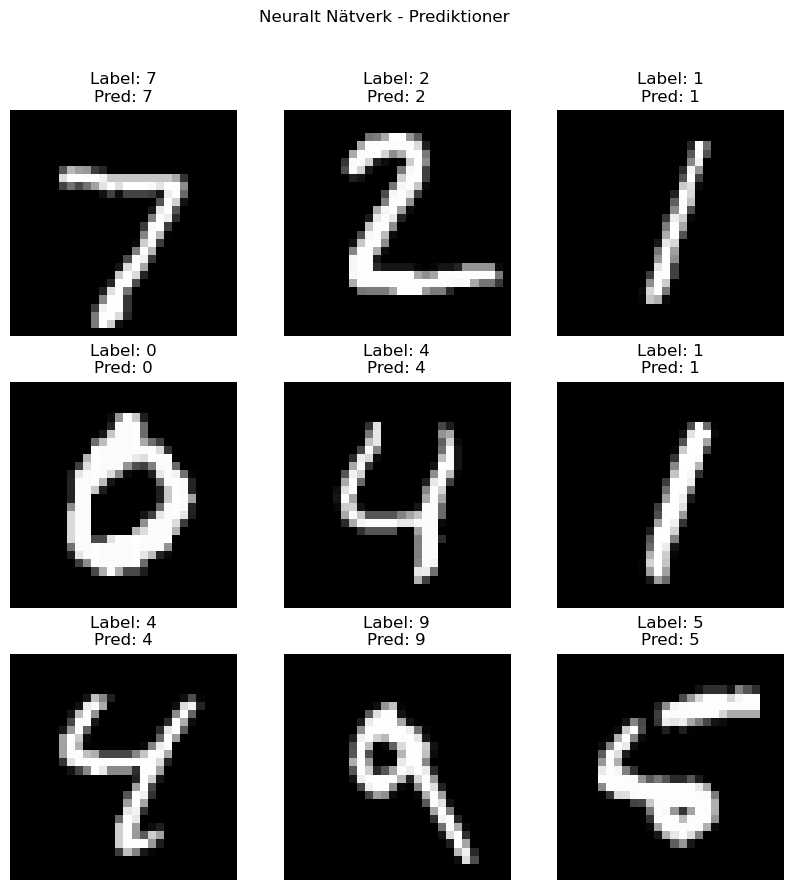

In [24]:
import matplotlib.pyplot as plt

# Visualisera prediktioner från logistisk regression
def plot_predictions(images, labels, predictions, title):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap="grey")
        plt.title(f"Label: {labels[i]}\nPred: {predictions[i]}")
        plt.axis("off")
    plt.suptitle(title, fontsize=12)
    plt.show()

# Logistisk regression
plot_predictions(X_test[:9], y_test[:9], test_pred_log[:9], "Logistisk Regression - Prediktioner")

# Neuralt nätverk
nn_predictions = np.argmax(model_nn.predict(X_test[:9]), axis=1)
plot_predictions(X_test[:9], y_test[:9], nn_predictions, "Neuralt Nätverk - Prediktioner")
